# **Atividade 5 - Exercício sobre o material Recurrent Neural Networks (RNNs)**

## **Disciplina:** CAP-421-3 Aprendizado Profundo

**Discintes:**

Gabriel Sansigolo

### **Importando bibliotecas**

In [1]:
import os
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

### **1 - Função Recupera XY**

In [2]:
def get_XY(time_series, time_steps):
    Y_ind = np.arange(time_steps, len(time_series), time_steps)
    Y = time_series[Y_ind]
    rows_x = len(Y)
    X = time_series[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

### **2 - Variaveis**

In [3]:
url = 'https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_756_time_series.csv'
split_percent = 0.3
time_steps = 24 # 12 corresponds to 2h of observations
hidden_units = 10
dense_units = 1
activation = 'tanh'

### **3 - Carrega Dados**

In [4]:
val_img1 = []   
val_img2 = []   
data_frame = read_csv(url, usecols=[1]) #, engine='python')
data = np.array(data_frame.values.astype('float32')).flatten()
data = data / data.max()
N = len(data)
split = int(N * split_percent)
train_data = data[0: split]
test_data = data[split:]

### **4 - Divide Treinamento e Teste**

In [5]:
# create X -> y for training and for testing
X_train, y_train = get_XY(train_data, time_steps)
X_test, y_test = get_XY(test_data, time_steps)

### **5 - Plot Exemplo**

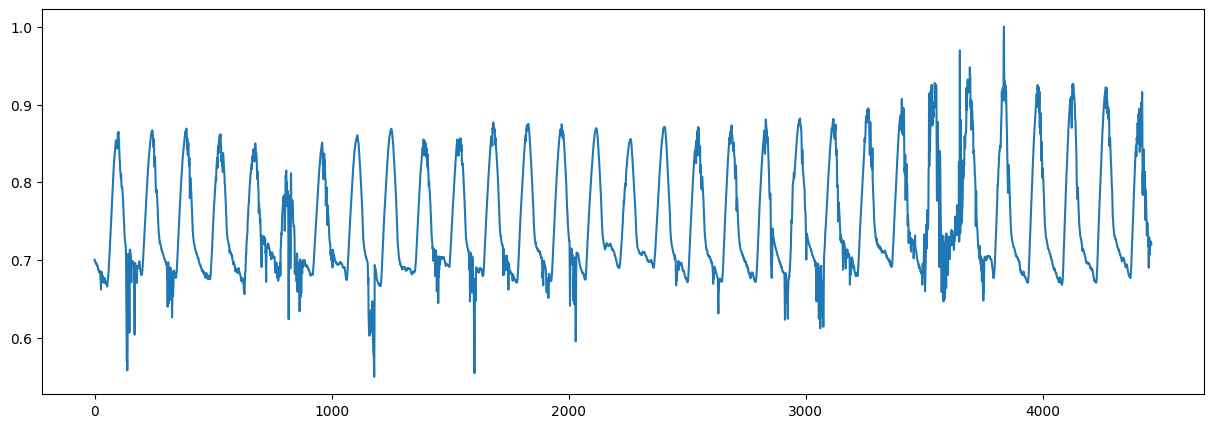

In [6]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'original data')

### **6 - Define e Treina a Rede**

In [7]:
# create the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(hidden_units,
                    input_shape = (time_steps, 1),
                    activation = activation))
model.add(Dense(units = dense_units,
                activation = activation))
model.compile(loss='mean_squared_error',
              optimizer='adam')

# train the model
epochs = 30
history = model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

Epoch 1/30


c:\Users\Sansigolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1314 - val_loss: 0.0056
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0073e-04 - val_loss: 0.0020
Epoch 9/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 11/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5772e-04 - val_loss: 0.0012
Epoch 12/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6847e-04 - val_l

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

### **7 - Plot Exemplo**

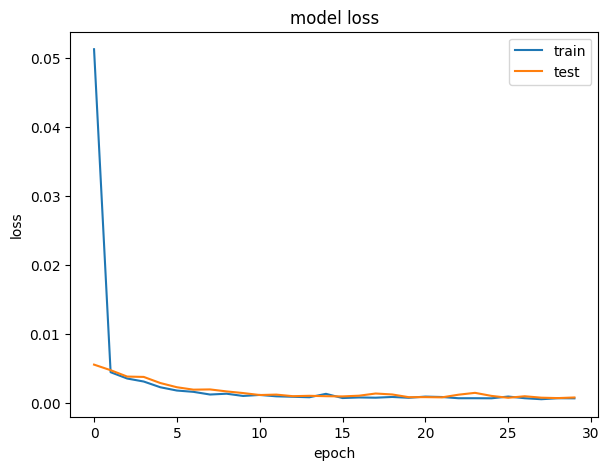

In [9]:
# plot original data to check time-series

plt.figure(figsize=(15,5))

plt.subplot(122)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

### **8 - Prevê**

In [10]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0.5, 1.0, 'Finding instants with high differences')

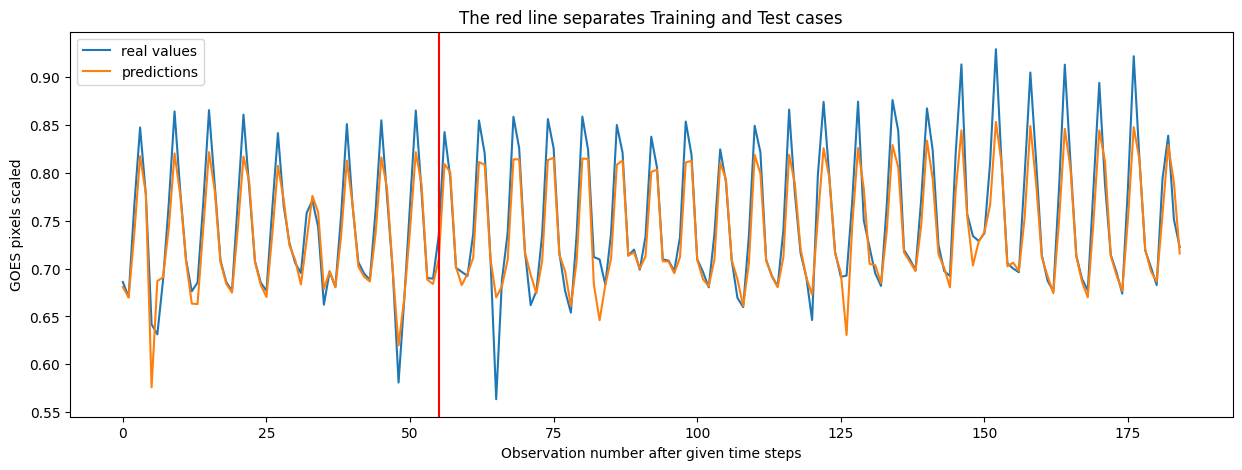

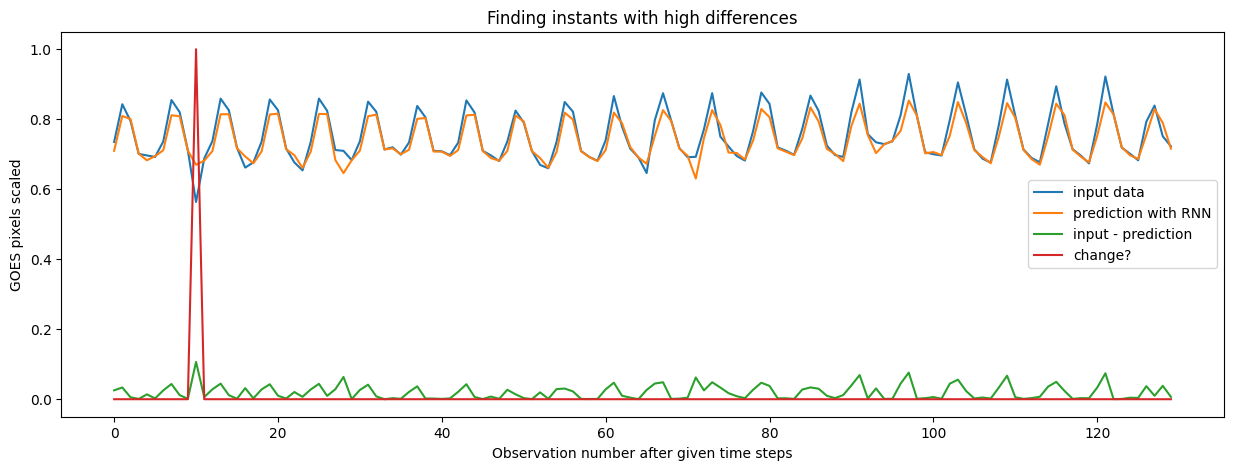

In [11]:
# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences')

### **9 - Aplica Rede Treinada na Curva 1**

In [12]:
path_dir = os.path.dirname("")

curve_1_data_frame = read_csv(os.path.join("curve-1.csv"), usecols=[1]) #, engine='python')
curve_1_data = np.array(curve_1_data_frame.values.astype('float32')).flatten()
curve_1_data = curve_1_data / curve_1_data.max()
N = len(data)
split = int(N * split_percent)
curve_1_train_data = curve_1_data[0: split]
curve_1_test_data = curve_1_data[split:]

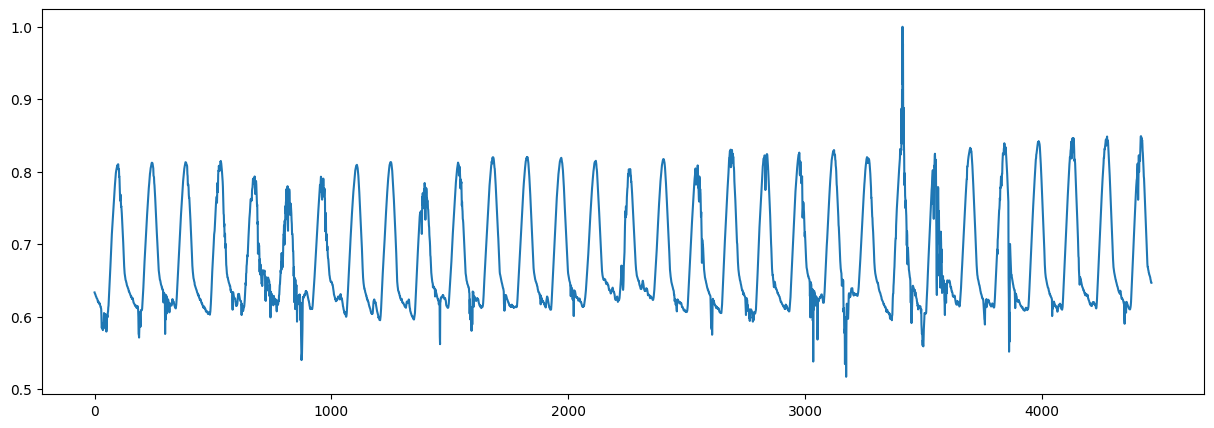

In [13]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(curve_1_data, label = 'curve 1 original data')

In [14]:
curve_1_X_train, curve_1_y_train = get_XY(curve_1_train_data, time_steps)
curve_1_X_test, curve_1_y_test = get_XY(curve_1_test_data, time_steps)

curve_1_train_predict = model.predict(curve_1_X_train)
curve_1_test_predict = model.predict(curve_1_X_test)

all_data = np.append(curve_1_y_train, curve_1_y_test)
predictions = np.append(curve_1_train_predict, curve_1_test_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Text(0.5, 1.0, 'Finding instants with high differences')

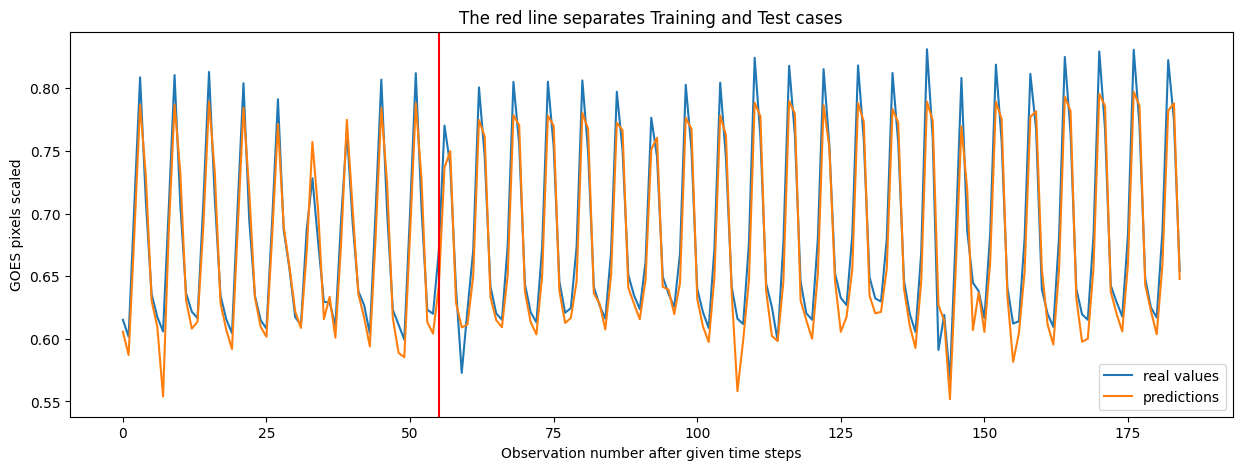

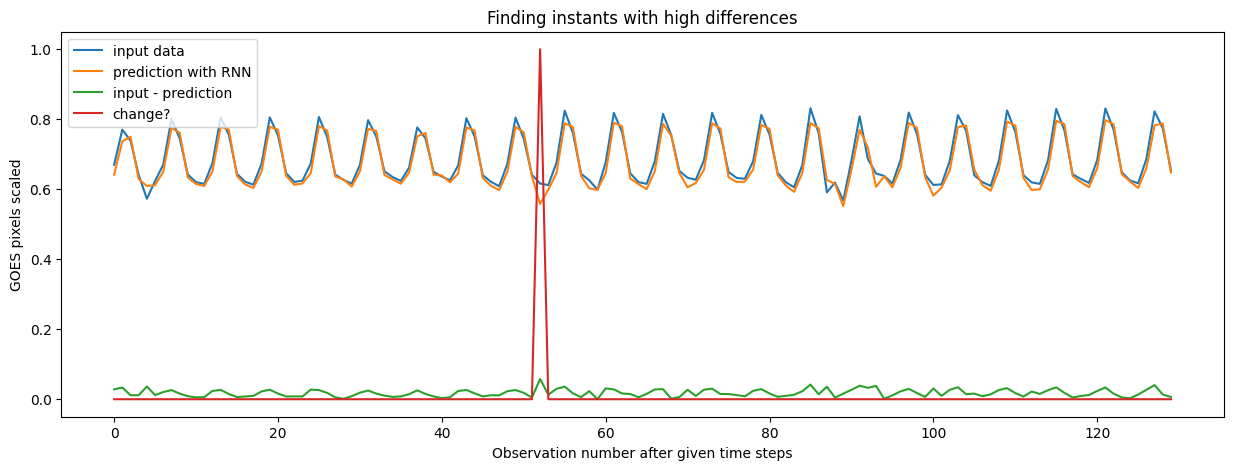

In [15]:
# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(curve_1_y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(curve_1_y_test - curve_1_test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(curve_1_y_test, label = 'input data')
plt.plot(curve_1_test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences')

### **10 - Aplica rede treinada na Curva 2**

In [16]:
path_dir = os.path.dirname("")

curve_2_data_frame = read_csv(os.path.join("curve-2.csv"), usecols=[1]) #, engine='python')
curve_2_data = np.array(curve_2_data_frame.values.astype('float32')).flatten()
curve_2_data = curve_2_data / curve_2_data.max()
N = len(curve_2_data)
split = int(N * split_percent)
curve_2_train_data = curve_2_data[0: split]
curve_2_test_data = curve_2_data[split:]

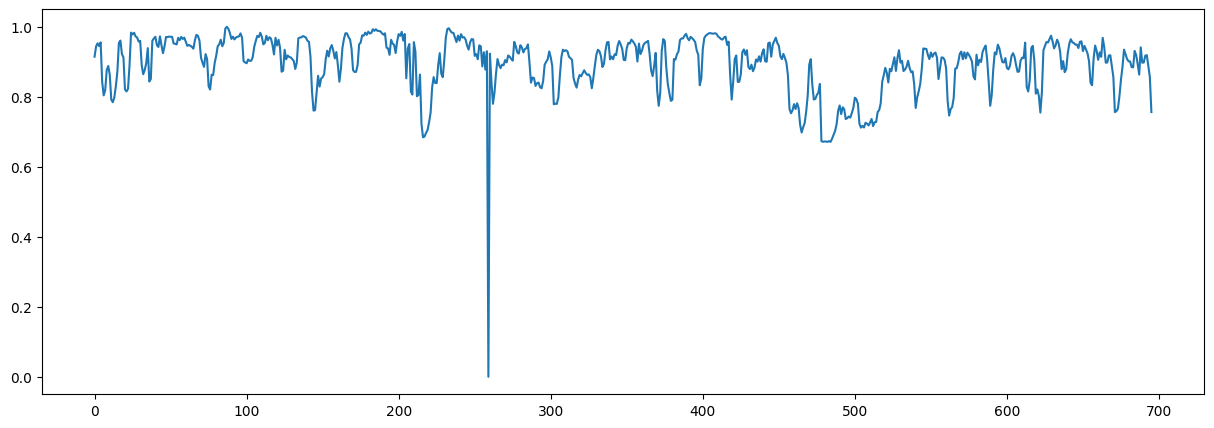

In [17]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(curve_2_data, label = 'curve 2 original data')

In [18]:
curve_2_X_train, curve_2_y_train = get_XY(curve_2_train_data, time_steps)
curve_2_X_test, curve_2_y_test = get_XY(curve_2_test_data, time_steps)

curve_2_train_predict = model.predict(curve_2_X_train)
curve_2_test_predict = model.predict(curve_2_X_test)

all_data = np.append(curve_2_y_train, curve_2_y_test)
predictions = np.append(curve_2_train_predict, curve_2_test_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(0.5, 1.0, 'Finding instants with high differences')

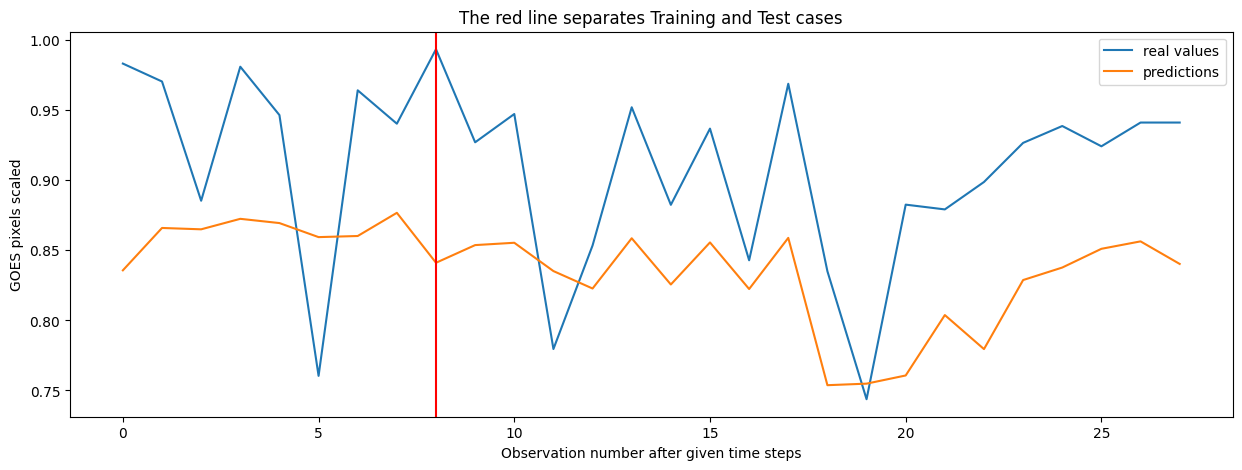

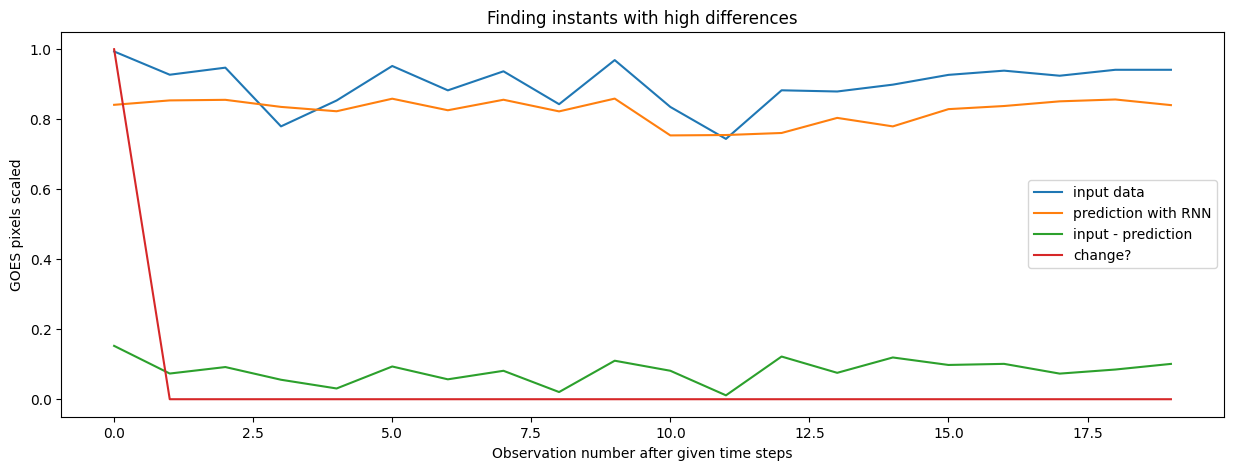

In [19]:
# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(curve_2_y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(curve_2_y_test - curve_2_test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(curve_2_y_test, label = 'input data')
plt.plot(curve_2_test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences')

### **11 - LSTM**

### **12 - Carrega Dados**

In [20]:
import torch
import torch.nn as nn

path_dir = os.path.dirname("")

data_frame = read_csv(os.path.join("curve-1.csv"), usecols=[1]) #, engine='python')
ts = np.array(data_frame.values.astype('float32')).flatten()
ts = ts / ts.max()
N = len(data)
split = int(N * split_percent)
train_data = data[0: split]
test_data = data[split:]

### **13 - Plot Exemplo**

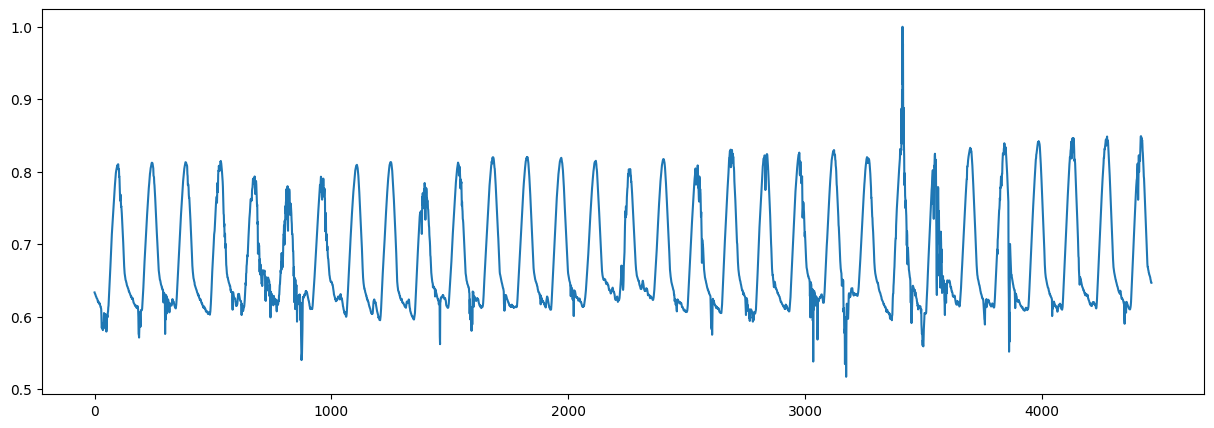

In [21]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(curve_1_data, label = 'curve 1 original data')

### **14 - Função Recupera XY**

In [22]:
def get_XY(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

### **15 - Divide Treinamento e Teste**

In [23]:
len_ts = 23
X, y = get_XY(curve_1_data, len_ts)

train_size = int(len(y) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### **16 - Cria Tensores Treinamento e Teste**

In [24]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

### **17 - Define a Rede**

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [26]:
input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1
model = LSTM(input_size, hidden_size, num_layers, output_size)

In [36]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### **18 - Treina a Rede**

In [37]:
num_epochs = 100

for epoch in range(num_epochs):
    outputs = model(X_train.unsqueeze(-1)).squeeze()  # Add .squeeze() here
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0027
Epoch [20/100], Loss: 0.0019
Epoch [30/100], Loss: 0.0008
Epoch [40/100], Loss: 0.0004
Epoch [50/100], Loss: 0.0003
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0001


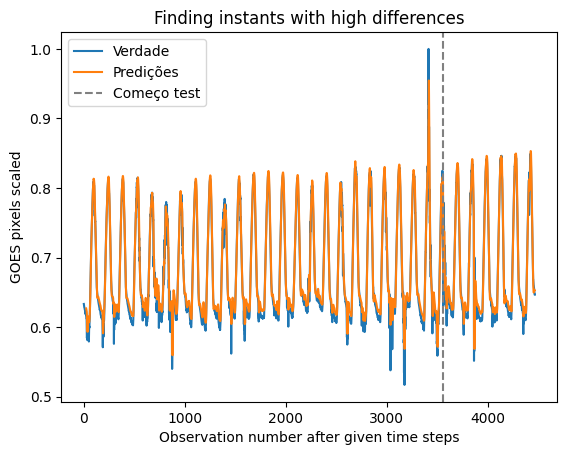

In [38]:
with torch.no_grad():
    train_outputs = model(X_train.unsqueeze(-1)).squeeze().numpy()
    test_outputs = model(X_test.unsqueeze(-1)).squeeze().numpy()
all_outputs = np.concatenate((train_outputs, test_outputs))

test_start_index = len(curve_1_data) - len(y_test) - len_ts

plt.plot(curve_1_data, label="Verdade")
plt.plot(range(len_ts, len_ts + len(all_outputs)), all_outputs, label="Predições")
plt.axvline(x=test_start_index, color='gray', linestyle='--', label="Começo test")
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences')
plt.show()